# Hoja de Trabajo 2

A continuación verá una lista de ejercicios que debe completar para poder entregar el hoja de trabajo #2. Al analizar, todos sus archivos deben estar contenidos en un archivo ht2-sucarnet.zip. Este archivo lo debe entregar en el link del GES. Por favor cree una carpeta para cada ejercicio que usted realice.

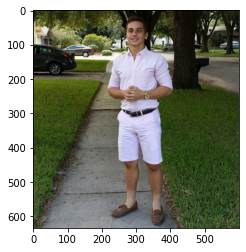

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Se carga la imagen y se convierte a formato RGB
img = cv2.imread("Foto.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Se despliega la imagen
plt.imshow(img)

## Problema 1

Desarrolle una función que permita hacer la binarización de una imagen. Para realizarlo puede utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los
valores 0 (negro) y 255 (blanco).

Valores Únicos: [  0 255]


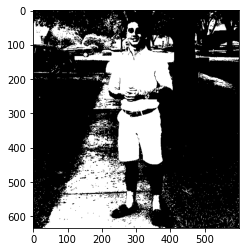

In [2]:
def binarize(img, threshold = 120):

    # Se convierte la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Se hace tresholding utilizando numpy
    img_bin = (gray > threshold) * 255

    return img_bin

# Se prueba la función creada
img_bin = binarize(img, threshold = 110)
plt.imshow(img_bin, cmap = "gray")

# Se comprueba que los únicos valores de pixel en la imagen 
# "binarizada" son 0 y 255
print("Valores Únicos:", np.unique(img_bin))

## Problema 2

Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario que la imagen esté binarizada. Para realizar las operaciones aritméticas se recomienda seleccionar imágenes que lo permitan y que sea fácil revisar el resultado.

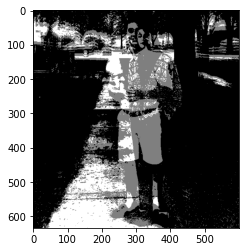

In [3]:
def image_arithmetic(img1, img2, operation):

    # Se "binarizan" las imágenes
    img1 = binarize(img1)
    img2 = binarize(img2)

    # Se suman las imágenes (ahora valores entre 0 y 510)
    # Se re-acomodan los valores entre 0 y 255 dividéndolos entre 2
    if operation == "SUM":
        img_out = (img1 + img2) // 2

    # Se restan las imágenes (ahora valores entre 0 y -255)
    # Se re-acomodan los valores entre 0 y 255 sumándoles 255
    elif operation == "SUBTRACT":
        img_out = (img1 - img2) + 255

    elif operation == "AND":
        img_out = np.logical_and(img1, img2)

    elif operation == "OR":
        img_out = np.logical_or(img1, img2)

    elif operation == "XOR":
        img_out = np.logical_xor(img1, img2)

    return img_out

# Se cargan las imágenes de prueba
img2 = cv2.imread("Foto2.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Se prueba la función creada
img_out = image_arithmetic(img, img2, operation = "SUM")
plt.imshow(img_out, cmap = "gray")

## Problema 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.


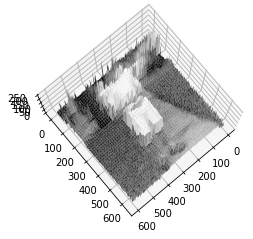

In [4]:
def img_Plot3D(img):
    # Se convierte la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Se crea una grid con las coordenadas de la imagen
    x = np.linspace(1, gray.shape[1], num = gray.shape[1])
    y = np.linspace(1, gray.shape[0], num = gray.shape[0])
    x_mesh, y_mesh = np.meshgrid(x, y)

    # Se crea una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Se plotea una superficie que cambia de altura según el valor del pixel
    ax.plot_surface(x_mesh, y_mesh, gray, cmap = "Greys_r")

    # Se rota la superficie
    ax.view_init(80, 50)

    return None


# Se prueba la función creada
img_Plot3D(img)

## Problema 4

Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial. Puede utilizar la misma función configurable por medio de parámetros, por ejemplo, si se ingresa 1 en el parámetro de selección se debería realizar una transformación lineal, si se ingresa 2 se debería realizar una transformación logarítmica y así sucesivamente.

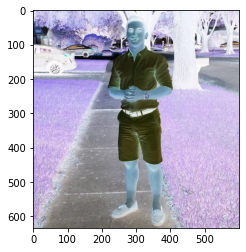

In [5]:
from scipy.interpolate import interp1d

def image_transforms(img, transform, alpha = 1, beta = 30, gamma = 0.05):

    # Se realiza la transformación deseada
    if transform == "Lin":
        img_out = alpha * img + beta

    elif transform == "Neg":
        img_out = 255 - img

    elif transform == "Log":
        # Se obtiene el valor de la constante de escalamiento "c"
        c = 255 / np.log(1 + np.max(img))

        # Se aplica la transformación
        img_out = c * np.log(1 + img)

    elif transform == "Exp":
        # Se aplica la transformación logarítmica
        img_out = alpha * (img ** gamma)

        # Se normalizan los valores entre 0 y 255
        # 1. Se resta el valor mínimo para que el valor más pequeño sea 0
        # 2. Se divide dentro del rango de valores (maximo - mínimo) para escalar los valores entre 0 y 1
        # 3. Se multiplica por 255 para escalar los valores entre 0 y 255
        img_out = ((img_out - np.min(img_out)) / (np.max(img_out) - np.min(img_out))) * 255

    # Se convierten los valores obtenidos en int
    return img_out.astype(int)

# Se prueba la función creada
img_transf = image_transforms(img, transform = "Neg")
plt.imshow(img_transf)

## Problema 5

Desarrolle una función que dada una imagen a color y kernel de cualquier dimensión (3X3, 5X5, 7X7, 9X9) y de cualquier tipo (Gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de
convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

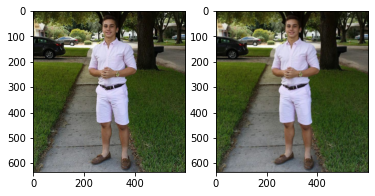

In [49]:
def convolve2D(img, kernel, padding = 0):

    # Se flipea el kernel sobre ambos ejes
    kernel = np.flipud(np.fliplr(kernel))

    # Tamaño del "padding" alrededor de la imagen original
    margin_size = kernel.shape[0] // 2

    # Se determina si la imagen tiene canales o no (su profundidad)
    # Si no tiene canales, se le redimensiona para tener una tercera dimensión
    if len(img.shape) < 3:
        depth = 1
        img = np.reshape(img, (img.shape[0], img.shape[1], 1))
    else:
        depth = img.shape[2]

    # Se crea una copia con ceros de la imagen original
    img_out = np.zeros_like(img)

    # Se "convoluciona" cada canal de la imagen por separado
    for chn in range(0, depth):

        # Se extrae cada una de los canales de color
        color_channel = img[:, :, chn]

        # Se le aplica padding a la imagen
        padded = np.pad(color_channel, margin_size, mode="constant", constant_values=padding)

        # Se recorre el "interior" de la imagen paddeada
        for row in range(margin_size, padded.shape[0] - margin_size):
            for col in range(margin_size, padded.shape[1] - margin_size):

                # Se selecciona una ventana de la imagen (con la misma forma del kernel)
                window = padded[row-margin_size:row+margin_size+1, col-margin_size:col+margin_size+1]

                # Se opera el kernel con la ventana
                pixel_val = np.sum(window*kernel)

                # Se guarda el valor de pixel anterior en un array con la misma forma que la imagen
                img_out[row-margin_size, col-margin_size, chn] = pixel_val
        
    return img_out

# Kernel para filtrar la imagen
kernel = np.ones((3,3)) * 1/9

# Se convoluciona la imagen
img_conv = convolve2D(img, kernel)

# Se grafican los resultados
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(img_conv)